#  Predicting the value of the football players 

# Insights

* Instead of having the dataset as whole, it is better to divide the data into 4 section which are attackers, midfielders, defence and goalkeepers. Some of the statistics recorded for some positions cannot be applied to the certain positions. For example data of goals and assists cannot be used for measuring the value of goalkeepers and defenders. It is not their job. So I decided to divide datasets into the 4 different section.
 
* Attack players happened to be more valuable other positions. Respectively Attackers > Midfielders >= Defenders > GoalKeepers

* I think there also must be difference according the players different roles in the positions. I am a good football fan and My common sense tells me that number 9 (Striker) number 7 (Winger Attack) and number 10 (Offensive Playmaker) always more valuable in football than other positions on the field. I could not extract that data from this data set and therefore I am leaving the dataset as is.

* I will only do graph of the attack players for simplicity.   


**INITIALIZE**

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Google Access**

In [141]:
# from google.colab import drive
# drive.mount('/content/drive')

In [142]:
dfPlayers = pd.read_csv('final_data.csv') # If you want to use your own computer you can install with git clone and use it directly in your computer.

In [143]:
dfPlayers.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


# Dividing DataFrame into 4 sections for each position.

In [144]:
dfAttackers = pd.DataFrame()
dfMid = pd.DataFrame()
dfDefend = pd.DataFrame()
dfGoalKeep = pd.DataFrame()

grouped = dfPlayers.groupby('position_encoded')
for position, group in grouped:
    if position == 1:
        dfGoalKeep = group
    elif position == 2:
        dfDefend = group
    elif position == 3:
        dfMid = group
    elif position == 4:
        dfAttackers = group

print(dfAttackers.head(5))
print(dfMid.head(5))
print(dfDefend.head(5))
print(dfGoalKeep.head(5))


                                       player               team  \
23     /marcus-rashford/profil/spieler/258923  Manchester United   
24        /jadon-sancho/profil/spieler/401173  Manchester United   
25      /anthony-elanga/profil/spieler/583189  Manchester United   
26  /alejandro-garnacho/profil/spieler/811779  Manchester United   
27              /antony/profil/spieler/602105  Manchester United   

                  name            position  height   age  appearance  \
23     Marcus Rashford   Attack-LeftWinger   185.0  25.0          88   
24        Jadon Sancho   Attack-LeftWinger   180.0  23.0          79   
25      Anthony Elanga   Attack-LeftWinger   178.0  21.0          63   
26  Alejandro Garnacho   Attack-LeftWinger   180.0  18.0          72   
27              Antony  Attack-RightWinger   172.0  23.0          80   

       goals   assists  yellow cards  ...  goals conceded  clean sheets  \
23  0.528790  0.196408      0.075541  ...             0.0           0.0   
24  0.21

In [145]:
dfAttackers.describe(include="all")
dfMid.describe(include="all")
dfDefend.describe(include="all")
dfGoalKeep.describe(include="all")

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,1229,1229,1229,1229,1229.000000,1229.000000,1229.000000,1229.000000,1229.0,1229.000000,...,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1.229000e+03,1.229000e+03,1229.0,1229.0
unique,1229,374,1229,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/daniel-margush/profil/spieler/414085,RB Leipzig,Daniel Margush,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6,1,1229,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,188.827516,27.465487,24.270138,0.000411,0.0,0.051199,...,1.152012,0.392717,2167.393816,90.724166,11.510985,1.867372,1.650801e+06,3.278621e+06,1.0,0.0
std,NaN,NaN,NaN,NaN,4.733452,5.618108,24.765288,0.005306,0.0,0.094104,...,0.732724,2.710437,2229.872532,153.628983,19.334597,3.257837,4.837958e+06,8.406940e+06,0.0,0.0
min,NaN,NaN,NaN,NaN,172.000000,15.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.0,0.0
25%,NaN,NaN,NaN,NaN,186.000000,23.000000,3.000000,0.000000,0.0,0.000000,...,0.842434,0.111111,270.000000,0.000000,0.000000,0.000000,1.000000e+05,2.000000e+05,1.0,0.0
50%,NaN,NaN,NaN,NaN,189.000000,27.000000,16.000000,0.000000,0.0,0.017496,...,1.214029,0.255102,1464.000000,13.000000,2.000000,1.000000,3.000000e+05,6.000000e+05,1.0,0.0
75%,NaN,NaN,NaN,NaN,192.000000,32.000000,40.000000,0.000000,0.0,0.075662,...,1.534091,0.363066,3562.000000,124.000000,16.000000,2.000000,1.000000e+06,2.250000e+06,1.0,0.0


In [146]:
dependent = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'goals conceded', 'clean sheets',
            'minutes played', 'days_injured', 'games_injured', 'award', 'highest_value', 'position_encoded', 'winger']
independent = 'current_value'


In [147]:
## Attacker Axis
xAxisAttack = dfAttackers.loc[:, dependent]
yAxisAttack = dfAttackers.loc[:, [independent]]


## Midfield Axis
xAxisMid = dfMid.loc[:, dependent]
yAxisMid = dfMid.loc[:, [independent]]

## Defender Axis
xAxisDefend = dfDefend.loc[:, dependent]
yAxisDefend = dfDefend.loc[:, [independent]]

## Goalkeeper Axis
xAxisGoalKeep = dfGoalKeep.loc[:, dependent]
yAxisGoalKeep = dfGoalKeep.loc[:, [independent]]


For data train splitting the values 

In [148]:

X_train_attack, X_test_attack, Y_train_attack, Y_test_attack = train_test_split(xAxisAttack, yAxisAttack, test_size=0.2, random_state=10)

X_train_mid, X_test_mid, Y_train_mid, Y_test_mid = train_test_split(xAxisMid, yAxisMid, test_size=0.2, random_state=10)

X_train_defend, X_test_defend, Y_train_defend, Y_test_defend = train_test_split(xAxisDefend, yAxisDefend, test_size=0.2, random_state=10)

X_train_keeper, X_test_keeper, Y_train_keeper, Y_test_keeper = train_test_split(xAxisGoalKeep, yAxisGoalKeep, test_size=0.2, random_state=10)




# For Each Data Set Create a scalar and predict the data

In [149]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

scaler_attack = StandardScaler()
X_train_scaled_attack = scaler_attack.fit_transform(X_train_attack)
X_test_scaled_attackk = scaler_attack.transform(X_test_attack)

scaler_mid = StandardScaler()
X_train_scaled_mid = scaler_mid.fit_transform(X_train_mid)
X_test_scaled_mid = scaler_mid.transform(X_test_mid)

scaler_defend = StandardScaler()
X_train_scaled_defend = scaler_defend.fit_transform(X_train_defend)
X_test_scaled_defend = scaler_defend.transform(X_test_defend)

scaler_keeper = StandardScaler()
X_train_scaled_keeper = scaler_keeper.fit_transform(X_train_keeper)
X_test_scaled_keeper = scaler_keeper.transform(X_test_keeper)



# Liner Reg Model For All Of the Data Frames

In [150]:
# regr = LinearRegression()
# regr.fit(xAxis, yAxis)

regr_attack = LinearRegression()
regr_attack.fit(xAxisAttack, yAxisAttack)

regr_mid = LinearRegression()
regr_mid.fit(xAxisMid, yAxisMid)

regr_defend = LinearRegression()
regr_defend.fit(xAxisDefend, yAxisDefend)

regr_keeper = LinearRegression()
regr_keeper.fit(xAxisGoalKeep, yAxisGoalKeep)



LinearRegression()

In [151]:
# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)
# print("------")

print("Attackers")
print('Intercept: \n', regr_attack.intercept_)
print('Coefficients: \n', regr_attack.coef_)
print("------")

print("Mid")
print('Intercept: \n', regr_mid.intercept_)
print('Coefficients: \n', regr_mid.coef_)
print("------")

print("Defend")
print('Intercept: \n', regr_defend.intercept_)
print('Coefficients: \n', regr_defend.coef_)
print("------")

print("Keeper")
print('Intercept: \n', regr_keeper.intercept_)
print('Coefficients: \n', regr_keeper.coef_) 
print("------")

Attackers
Intercept: 
 [7864998.7925619]
Coefficients: 
 [[-2.55201869e+03 -3.15501274e+05 -6.72867156e+04  8.61089413e+05
   1.50491141e+06  9.89538749e+04  3.27418093e-10 -1.74622983e-10
   1.73801123e+03  3.26159891e+03 -4.05041555e+04 -3.83748484e+05
   5.71070564e-01  0.00000000e+00 -5.46165202e+04]]
------
Mid
Intercept: 
 [5686671.61803558]
Coefficients: 
 [[ 1.75867749e+03 -2.49476964e+05 -6.79864116e+04  5.15849925e+05
   8.81532381e+05  3.21729159e+05 -8.73114914e-11 -5.82076609e-11
   1.42606952e+03  6.40851386e+03 -6.84024814e+04 -3.63805177e+05
   6.45876476e-01  0.00000000e+00 -5.71079879e+04]]
------
Defend
Intercept: 
 [5760188.97489896]
Coefficients: 
 [[-3.37805819e+03 -2.10034078e+05 -5.51148336e+04  7.29928660e+05
   6.79081429e+05  4.00386744e+04  4.29281499e-10 -1.16415322e-10
   1.06435568e+03  5.09060162e+03 -5.55766515e+04 -2.40754082e+05
   6.42062871e-01  0.00000000e+00 -1.82158749e+03]]
------
Keeper
Intercept: 
 [-1410826.92747693]
Coefficients: 
 [[ 1.8478

**Test the model with a newly created player**

In [152]:
regr_attack.fit(xAxisAttack, yAxisAttack)
regr_mid.fit(xAxisMid, yAxisMid)
regr_defend.fit(xAxisDefend, yAxisDefend)
regr_keeper.fit(xAxisGoalKeep, yAxisGoalKeep)

print(regr_attack.intercept_)



[7864998.7925619]


In [153]:



## We will create a player and then test for each data frame


# dependent = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'goals conceded', 'clean sheets',
#             'minutes played', 'days_injured', 'games_injured', 'award', 'highest_value', 'position_encoded', 'winger']

# I will put Jaden Philogene Statistics to this
# https://www.transfermarkt.com/jaden-philogene/leistungsdatenverein/spieler/665390

newPlayer = [185, 28, 100, 10, 5, 3, 20, 12, 8000, 50, 5, 10, 60000000, 2, 0]

predicted_value_attack = regr_attack.predict([newPlayer])
predicted_value_mid = regr_mid.predict([newPlayer])
predicted_value_defend = regr_defend.predict([newPlayer])
predicted_value_keeper = regr_keeper.predict([newPlayer])

print("Attack")
print("Value: \n", predicted_value_attack)

print("Mid")
print("Value: \n", predicted_value_mid)

print("Defend")
print("Value: \n", predicted_value_defend)

print("Keeper")
print("Value: \n", predicted_value_keeper)


Attack
Value: 
 [[52553878.96797729]]
Mid
Value: 
 [[49260885.61248494]]
Defend
Value: 
 [[49165344.20349461]]
Keeper
Value: 
 [[-16222237.2856457]]


C:\Users\90543\PycharmProjects\IE423\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\90543\PycharmProjects\IE423\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\90543\PycharmProjects\IE423\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\90543\PycharmProjects\IE423\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


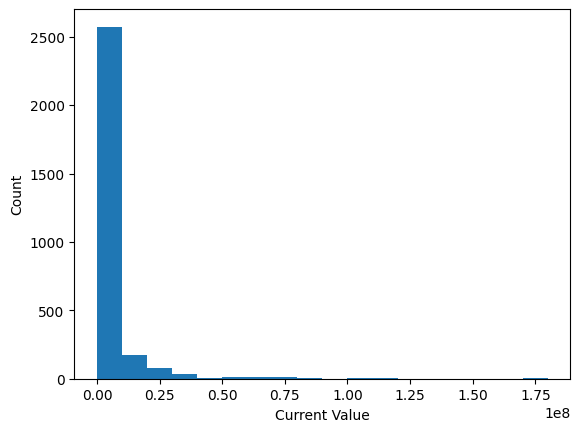

In [154]:
y = dfAttackers.loc[:, 'current_value']

# Set histogram parameters
binwidth = 10000000
binrange = np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Current Value')
plt.ylabel('Count')
plt.show()

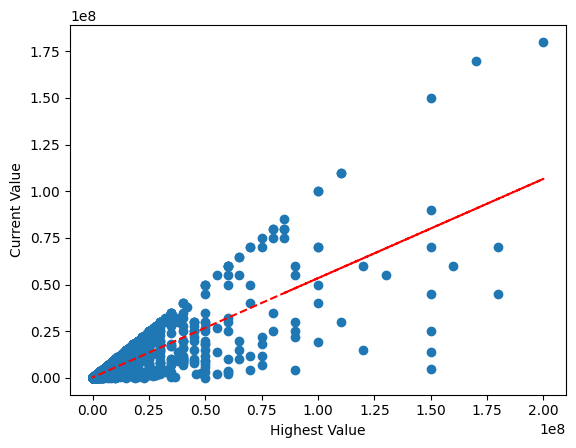

In [155]:
x = dfAttackers.loc[:, 'highest_value']
y = dfAttackers.loc[:, 'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x, p(x), "r--")
plt.xlabel('Highest Value')
plt.ylabel('Current Value')
plt.show()

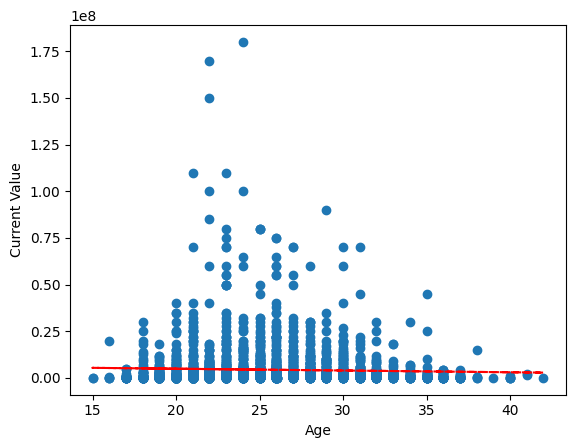

In [156]:
# Scatterplot of current value vs. age
# Set data fields
x = dfAttackers.loc[:, 'age']
y = dfAttackers.loc[:, 'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x, p(x), "r--")
plt.xlabel('Age')
plt.ylabel('Current Value')
plt.show()